# 1. Modelo completo sin las variables "housing", "default" y "day_of_week"

In [2]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np



# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Preprocesamiento de datos y ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("dataset_modelo.csv")

In [4]:
# Transformación de la variable "y" a binaria
df['y_bin'] = df['y'].map({"no": 0, "yes": 1})

In [124]:
cols_modelo = [
    "y_bin",
    "age_group",
    "job",
    "marital",
    "education_group",
    "contact",
    "campaign_group",
    "previous_group",
    "pdays_real",
    "poutcome",
    "month",
    "euribor3m",
    "cons.price.idx",
    "cons.conf.idx",

]

df_model = df[cols_modelo].copy()

In [125]:
from sklearn.preprocessing import StandardScaler

num_cols = ["euribor3m", "cons.price.idx","cons.conf.idx"]

# Rellenar NaN con mediana
for col in num_cols:
    df_model[col] = df_model[col].fillna(df_model[col].median())

# Escalar
scaler = StandardScaler()
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

In [126]:
cat_cols = [
    "age_group",
    "campaign_group",
    "previous_group",
    "job",
    "marital",
    "month",
    "education_group",
    "contact",
    "poutcome",
]

df_model_dum = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

In [127]:
X = df_model_dum.drop("y_bin", axis=1)
y = df_model_dum["y_bin"]


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [129]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7308
           1       0.35      0.66      0.46       928

    accuracy                           0.83      8236
   macro avg       0.65      0.75      0.68      8236
weighted avg       0.88      0.83      0.85      8236

[[6203 1105]
 [ 320  608]]


In [131]:
# Predicciones en TRAIN
y_pred_train = log_reg.predict(X_train)
y_prob_train = log_reg.predict_proba(X_train)[:, 1]

print("=== TRAIN ===")
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


=== TRAIN ===
              precision    recall  f1-score   support

           0       0.95      0.85      0.89     29229
           1       0.34      0.63      0.44      3711

    accuracy                           0.82     32940
   macro avg       0.65      0.74      0.67     32940
weighted avg       0.88      0.82      0.84     32940

[[24787  4442]
 [ 1390  2321]]


In [132]:
import numpy as np

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef_log_odds": log_reg.coef_[0]
})

coef_df["odds_ratio"] = np.exp(coef_df["coef_log_odds"])

coef_df = coef_df.sort_values(by="coef_log_odds", ascending=False)

coef_df.head(20)

,feature,coef_log_odds,odds_ratio
48,poutcome_success,1.645467,5.183431
38,month_mar,1.096341,2.993193
41,month_oct,0.531089,1.700783
35,month_dec,0.381171,1.463997
33,marital_unknown,0.295074,1.343226
47,poutcome_nonexistent,0.274621,1.316031
2,cons.price.idx,0.236764,1.267142
24,job_retired,0.214808,1.239624
3,cons.conf.idx,0.200613,1.222152
27,job_student,0.196900,1.217623


In [133]:
top_yes = coef_df[coef_df["coef_log_odds"] > 0].head(25)
top_yes

,feature,coef_log_odds,odds_ratio
48,poutcome_success,1.645467,5.183431
38,month_mar,1.096341,2.993193
41,month_oct,0.531089,1.700783
35,month_dec,0.381171,1.463997
33,marital_unknown,0.295074,1.343226
47,poutcome_nonexistent,0.274621,1.316031
2,cons.price.idx,0.236764,1.267142
24,job_retired,0.214808,1.239624
3,cons.conf.idx,0.200613,1.222152
27,job_student,0.196900,1.217623


In [134]:
top_no = coef_df[coef_df["coef_log_odds"] < 0].sort_values(by="coef_log_odds").head(30)
top_no

,feature,coef_log_odds,odds_ratio
1,euribor3m,-0.816285,0.442071
39,month_may,-0.784692,0.456260
46,contact_telephone,-0.427012,0.652456
12,previous_group_1,-0.301976,0.739356
42,month_sep,-0.290227,0.748093
34,month_aug,-0.284572,0.752336
11,campaign_group_4+,-0.222705,0.800351
40,month_nov,-0.201723,0.817322
13,previous_group_2,-0.197651,0.820657
29,job_unemployed,-0.195825,0.822156


In [172]:
df_scores = X_test.copy()
df_scores["prob"] = y_prob
df_scores["real"] = y_test.values

df_scores["decile"] = pd.qcut(df_scores["prob"], 10, labels=False)

lift_table = df_scores.groupby("decile").agg(
    n=("real", "count"),
    conv=("real", "mean"),
    proba_mean=("prob", "mean")
).reset_index()

global_rate = df_scores["real"].mean()
lift_table["lift_vs_global"] = lift_table["conv"] / global_rate

lift_table.sort_values("decile", ascending=False)

,decile,n,conv,proba_mean,lift_vs_global
9,9,824,0.500000,0.865088,4.437500
8,8,823,0.233293,0.637479,2.070474
7,7,823,0.082625,0.453424,0.733293
6,6,823,0.066829,0.380688,0.593104
5,5,825,0.040000,0.348574,0.355000
4,4,823,0.043742,0.322202,0.388214
3,3,822,0.054745,0.294622,0.485858
2,2,825,0.038788,0.256870,0.344242
1,1,818,0.033007,0.204693,0.292940
0,0,830,0.033735,0.169095,0.299398


In [136]:
def clasificar_variable(nombre):
    if any(x in nombre for x in ["euribor", "cons.price","cons.conf.idx" ]):
        return "Macro"
    elif "month_" in nombre:
        return "Estacional"
    elif any(x in nombre for x in ["age_group", "job", "marital", "education_group"]):
        return "Demográfica"
    elif any(x in nombre for x in ["poutcome", "campaign_group", "previous_group", "pdays_real", "contact"]):
        return "Operativa"
    else:
        return "Otros"

coef_df["tipo_variable"] = coef_df["feature"].apply(clasificar_variable)


In [137]:
coef_df.to_csv("modelo_completo_coeficientes.csv", index=False)


In [138]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


In [169]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# AUC
auc = roc_auc_score(y_test, y_prob)

# Especificidad
specificity = tn / (tn + fp)

metricas_df = pd.DataFrame({
    "metric": [
        "accuracy",
        "precision_yes",
        "recall_yes",
        "f1_yes",
        "specificity",
        "auc",
        "true_negatives",
        "false_positives",
        "false_negatives",
        "true_positives"
    ],
    "value": [
        report["accuracy"],
        report["1"]["precision"],
        report["1"]["recall"],
        report["1"]["f1-score"],
        specificity,
        auc,
        tn,
        fp,
        fn,
        tp
    ]
})

metricas_df.to_csv("modelo_completo_metricas_test.csv", index=False)

metricas_df





,metric,value
0,accuracy,0.826979
1,precision_yes,0.354933
2,recall_yes,0.655172
3,f1_yes,0.460432
4,specificity,0.848796
5,auc,0.797322
6,true_negatives,6203.000000
7,false_positives,1105.000000
8,false_negatives,320.000000
9,true_positives,608.000000


In [167]:
# Classification report
report = classification_report(y_train, y_pred_train, output_dict=True)

# Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

# AUC
auc = roc_auc_score(y_train, y_pred_train)

# Especificidad
specificity = tn / (tn + fp)

metricas_df_train = pd.DataFrame({
    "metric": [
        "accuracy",
        "precision_yes",
        "recall_yes",
        "f1_yes",
        "specificity",
        "auc",
        "true_negatives",
        "false_positives",
        "false_negatives",
        "true_positives"
    ],
    "value": [
        report["accuracy"],
        report["1"]["precision"],
        report["1"]["recall"],
        report["1"]["f1-score"],
        specificity,
        auc,
        tn,
        fp,
        fn,
        tp
    ]
})

metricas_df_train.to_csv("modelo_completo_metricas_train.csv", index=False)

metricas_df_train

,metric,value
0,accuracy,0.822951
1,precision_yes,0.343191
2,recall_yes,0.625438
3,f1_yes,0.443193
4,specificity,0.848028
5,auc,0.736733
6,true_negatives,24787.000000
7,false_positives,4442.000000
8,false_negatives,1390.000000
9,true_positives,2321.000000


In [168]:
# Filtramos solo las métricas que queremos comparar
metrics_to_compare = ["accuracy", "precision_yes", "recall_yes", "specificity", "auc"]

train_filtered = metricas_df_train[metricas_df_train["metric"].isin(metrics_to_compare)].copy()
test_filtered = metricas_df[metricas_df["metric"].isin(metrics_to_compare)].copy()

# Renombramos columna value
train_filtered = train_filtered.rename(columns={"value": "train_value"})
test_filtered = test_filtered.rename(columns={"value": "test_value"})

# Merge
df_comparison = train_filtered.merge(
    test_filtered[["metric", "test_value"]],
    on="metric",
    how="inner"
)

df_comparison.to_csv("modelo_completo_metricas_train_test.csv", index=False)
df_comparison

,metric,train_value,test_value
0,accuracy,0.822951,0.826979
1,precision_yes,0.343191,0.354933
2,recall_yes,0.625438,0.655172
3,specificity,0.848028,0.848796
4,auc,0.736733,0.797322


In [140]:
import statsmodels

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Nos aseguramos de que X_train sea numérico
X_vif = X_train.copy()
X_vif = X_vif.select_dtypes(include=[np.number])

# Eliminamos posibles infinitos o NaNs
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)
X_vif = X_vif.dropna()

# Añadimos constante
X_vif["const"] = 1

vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) 
              for i in range(X_vif.shape[1])]

vif.sort_values("VIF", ascending=False)

,feature,VIF
1,euribor3m,2.423884
2,cons.price.idx,2.069848
3,cons.conf.idx,1.166189
0,pdays_real,1.150549
4,const,1.030382


In [143]:
# Media de variables macro por mes
macro_por_mes = df.groupby("month")[[
    "euribor3m",
    "emp.var.rate",
    "nr.employed",
    "cons.price.idx",
    "cons.conf.idx"
]].mean()

macro_por_mes



,euribor3m,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx
month,,,,,
apr,1.361047,-1.800000,5093.121437,93.119575,-46.273318
aug,4.300408,0.746940,5200.239330,93.311022,-35.597021
dec,0.865319,-2.846154,5031.895604,92.715363,-33.708791
jul,4.686026,1.159353,5214.089985,93.895109,-42.371209
jun,4.256908,0.688379,5197.493193,94.245402,-41.579428
mar,1.162745,-1.800000,5055.390110,93.097330,-42.650549
may,3.293696,-0.164945,5149.522242,93.528894,-40.579168
nov,3.723018,-0.418561,5173.025683,93.200944,-41.238561
oct,1.200762,-2.437238,5018.825662,93.176145,-34.591632


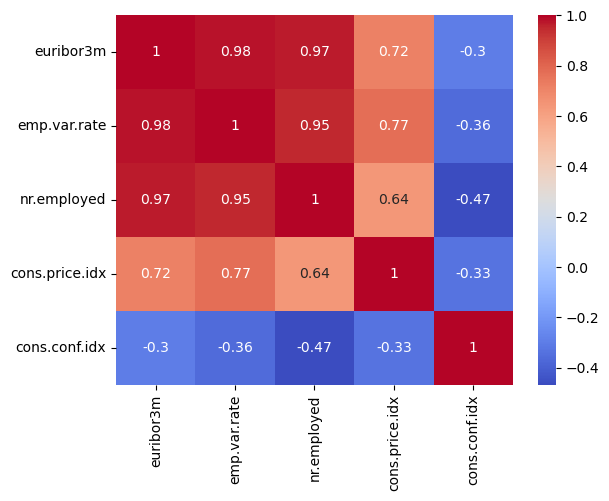

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(macro_por_mes.corr(), annot=True, cmap="coolwarm")
plt.show()

In [145]:
metricas_df.to_csv("modelo_completo_metricas.csv", index=False)

In [173]:
lift_table.to_csv("modelo_completo_deciles.csv", index=False)

In [147]:
df_result = X_test.copy()
df_result["y_real"] = y_test.values
df_result["prob_modelo"] = y_prob

df_result.to_csv("modelo_completo_scoring.csv", index=False)


In [148]:
df_scoring = df.loc[X_test.index, ["age_group","job","marital","education_group","pdays_group","previous_group","campaign_group","poutcome","month","contact"]].copy()
df_scoring["prob_modelo"] = y_prob
df_scoring["y_real"] = y_test.values

df_scoring.columns = [c.replace(".", "_").replace(" ", "_") for c in df_scoring.columns]
df_scoring.to_csv("modelo_completo_scoring.csv", index=False)




In [149]:
import numpy as np
import pandas as pd

# ==========================
# 0) PRE-REQUISITOS (DEBEN EXISTIR YA)
# ==========================
# - X_test : DataFrame (features ya dummificadas, mismas columnas que el train)
# - y_test : Series (0/1)  -> solo si estás en histórico/test
# - y_prob : array (probabilidades del modelo en X_test, clase 1)
#
# Si no tienes y_prob:
# y_prob = log_reg.predict_proba(X_test)[:, 1]

# ==========================
# 1) CREAR client_id (para el subset que vas a exportar)
# ==========================
# Como tú no tienes client_id, lo creamos SOLO para X_test:
scoring_df = X_test.copy()
scoring_df = scoring_df.reset_index(drop=True)  # index limpio
scoring_df["client_id"] = np.arange(1, len(scoring_df) + 1)

# ==========================
# 2) AÑADIR PROBABILIDAD + (OPCIONAL) y_real
# ==========================
scoring_df["prob_modelo"] = y_prob

# Si tienes y_test (histórico), lo metemos para validar conversion real por top%
if "y_test" in globals() or "y_test" in locals():
    scoring_df["y_real"] = y_test.reset_index(drop=True)

# ==========================
# 3) DECILES (si ya los tienes, puedes saltarte esto)
# ==========================
# Decil 10 = más probabilidad
scoring_df["decil"] = pd.qcut(scoring_df["prob_modelo"], 10, labels=False, duplicates="drop") + 1
scoring_df["decil"] = scoring_df["decil"].astype(int)

# Ordenamos de mayor a menor probabilidad (lista priorizada)
scoring_df = scoring_df.sort_values("prob_modelo", ascending=False).reset_index(drop=True)

# ==========================
# 4) FLAGS TOP% (para listas operativas)
# ==========================
TOP_PCTS = [0.05, 0.10, 0.20, 0.30]
N = len(scoring_df)

for p in TOP_PCTS:
    k = int(np.ceil(N * p))
    col_flag = f"es_top_{int(p*100)}"
    scoring_df[col_flag] = 0
    scoring_df.loc[:k-1, col_flag] = 1

# ==========================
# 5) EXPORTS CSV (LISTOS PARA EQUIPO)
# ==========================
# A) scoring completo (para dashboard o revisión)
cols_export = ["client_id", "prob_modelo", "decil"] + [f"es_top_{int(p*100)}" for p in TOP_PCTS]
if "y_real" in scoring_df.columns:
    cols_export += ["y_real"]

scoring_df[cols_export].to_csv("modelo_scoring_completo_test.csv", index=False)

# B) listas por top%
for p in TOP_PCTS:
    k = int(np.ceil(N * p))
    df_top = scoring_df.head(k)[cols_export].copy()
    df_top.to_csv(f"clientes_top_{int(p*100)}_test.csv", index=False)

print("✅ Exportados:")
print("- modelo_scoring_completo_test.csv")
for p in TOP_PCTS:
    print(f"- clientes_top_{int(p*100)}_test.csv")

# ==========================
# 6) (OPCIONAL) KPI DE LIFT POR TOP% (si tienes y_real)
# ==========================
if "y_real" in scoring_df.columns:
    base_rate = scoring_df["y_real"].mean()
    print(f"\n📌 Conversión media en TEST: {base_rate:.4f}")
    for p in TOP_PCTS:
        k = int(np.ceil(N * p))
        conv_top = scoring_df.head(k)["y_real"].mean()
        lift = conv_top / base_rate if base_rate > 0 else np.nan
        print(f"Top {int(p*100)}% -> conv_real={conv_top:.4f} | lift={lift:.2f}x | n={k}")


✅ Exportados:
- modelo_scoring_completo_test.csv
- clientes_top_5_test.csv
- clientes_top_10_test.csv
- clientes_top_20_test.csv
- clientes_top_30_test.csv

📌 Conversión media en TEST: 0.1127
Top 5% -> conv_real=0.5850 | lift=5.19x | n=412
Top 10% -> conv_real=0.5000 | lift=4.44x | n=824
Top 20% -> conv_real=0.3665 | lift=3.25x | n=1648
Top 30% -> conv_real=0.2720 | lift=2.41x | n=2471


In [150]:
scoring_df[scoring_df["es_top_20"] == 1].head()


,pdays_real,euribor3m,cons.price.idx,cons.conf.idx,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+,age_group_<=25,campaign_group_2,campaign_group_3,campaign_group_4+,previous_group_1,previous_group_2,previous_group_3,previous_group_0,previous_group_1,previous_group_2,previous_group_3,previous_group_4+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_group_low_education,education_group_medium_education,education_group_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,client_id,prob_modelo,y_real,decil,es_top_5,es_top_10,es_top_20,es_top_30
0,5,-1.710255,-0.357133,1.232304,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,3619,0.991884,1,10,1,1,1,1
1,6,-1.710255,-0.357133,1.232304,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,5854,0.991831,1,10,1,1,1,1
2,10,-1.710832,-0.357133,1.232304,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,122,0.990988,1,10,1,1,1,1
3,9,-1.717174,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,1928,0.990969,0,10,1,1,1,1
4,7,-1.711408,-0.357133,1.232304,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,7056,0.990750,0,10,1,1,1,1


In [151]:
scoring_df[scoring_df["es_top_20"] == 1].head()


,pdays_real,euribor3m,cons.price.idx,cons.conf.idx,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+,age_group_<=25,campaign_group_2,campaign_group_3,campaign_group_4+,previous_group_1,previous_group_2,previous_group_3,previous_group_0,previous_group_1,previous_group_2,previous_group_3,previous_group_4+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_group_low_education,education_group_medium_education,education_group_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,client_id,prob_modelo,y_real,decil,es_top_5,es_top_10,es_top_20,es_top_30
0,5,-1.710255,-0.357133,1.232304,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,3619,0.991884,1,10,1,1,1,1
1,6,-1.710255,-0.357133,1.232304,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,5854,0.991831,1,10,1,1,1,1
2,10,-1.710832,-0.357133,1.232304,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,122,0.990988,1,10,1,1,1,1
3,9,-1.717174,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,1928,0.990969,0,10,1,1,1,1
4,7,-1.711408,-0.357133,1.232304,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,7056,0.990750,0,10,1,1,1,1


In [152]:
scoring_df.sort_values("prob_modelo", ascending=False).head(10)


,pdays_real,euribor3m,cons.price.idx,cons.conf.idx,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+,age_group_<=25,campaign_group_2,campaign_group_3,campaign_group_4+,previous_group_1,previous_group_2,previous_group_3,previous_group_0,previous_group_1,previous_group_2,previous_group_3,previous_group_4+,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,education_group_low_education,education_group_medium_education,education_group_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,client_id,prob_modelo,y_real,decil,es_top_5,es_top_10,es_top_20,es_top_30
0,5,-1.710255,-0.357133,1.232304,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,3619,0.991884,1,10,1,1,1,1
1,6,-1.710255,-0.357133,1.232304,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,5854,0.991831,1,10,1,1,1,1
2,10,-1.710832,-0.357133,1.232304,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,122,0.990988,1,10,1,1,1,1
3,9,-1.717174,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,1928,0.990969,0,10,1,1,1,1
4,7,-1.711408,-0.357133,1.232304,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,7056,0.990750,0,10,1,1,1,1
5,6,-1.711985,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,5880,0.989975,1,10,1,1,1,1
6,6,-1.722363,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,247,0.989819,1,10,1,1,1,1
7,7,-1.719480,-0.357133,1.232304,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,2054,0.989052,0,10,1,1,1,1
8,6,-1.711985,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,7826,0.988784,1,10,1,1,1,1
9,3,-1.715444,-0.357133,1.232304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False

In [153]:
base = scoring_df["y_real"].mean()
for p in [0.01, 0.05, 0.10]:
    k = int(len(scoring_df) * p)
    conv = scoring_df.head(k)["y_real"].mean()
    print(p, "conv:", conv, "lift:", conv/base)


0.01 conv: 0.7073170731707317 lift: 6.277439024390244
0.05 conv: 0.583941605839416 lift: 5.182481751824817
0.1 conv: 0.5006075334143378 lift: 4.442891859052248


In [154]:
def analizar_top_percent(percent):
    
    # Número de clientes a incluir
    n_clientes = int(len(scoring_df) * percent)
    
    # Ordenamos por probabilidad descendente
    df_sorted = scoring_df.sort_values("prob_modelo", ascending=False)
    
    # Seleccionamos top X%
    df_top = df_sorted.head(n_clientes)
    
    # Métricas
    yes_capturados = df_top["y_real"].sum()
    yes_totales = scoring_df["y_real"].sum()
    yes_escapados = yes_totales - yes_capturados
    
    conversion_top = yes_capturados / n_clientes
    recall_efectivo = yes_capturados / yes_totales
    
    print(f"\n=== TOP {int(percent*100)}% ===")
    print("Clientes llamados:", n_clientes)
    print("YES capturados:", yes_capturados)
    print("YES escapados:", yes_escapados)
    print("Conversión en ese segmento:", round(conversion_top,3))
    print("Recall efectivo:", round(recall_efectivo,3))


In [155]:
analizar_top_percent(0.05)
analizar_top_percent(0.10)
analizar_top_percent(0.15)
analizar_top_percent(0.20)
analizar_top_percent(0.30)



=== TOP 5% ===
Clientes llamados: 411
YES capturados: 240
YES escapados: 688
Conversión en ese segmento: 0.584
Recall efectivo: 0.259

=== TOP 10% ===
Clientes llamados: 823
YES capturados: 412
YES escapados: 516
Conversión en ese segmento: 0.501
Recall efectivo: 0.444

=== TOP 15% ===
Clientes llamados: 1235
YES capturados: 543
YES escapados: 385
Conversión en ese segmento: 0.44
Recall efectivo: 0.585

=== TOP 20% ===
Clientes llamados: 1647
YES capturados: 604
YES escapados: 324
Conversión en ese segmento: 0.367
Recall efectivo: 0.651

=== TOP 30% ===
Clientes llamados: 2470
YES capturados: 672
YES escapados: 256
Conversión en ese segmento: 0.272
Recall efectivo: 0.724


In [156]:
# ¿Cuántos YES adicionales capturo por cada llamada adicional?
def marginal_gain(p1, p2):
    df_sorted = scoring_df.sort_values("prob_modelo", ascending=False)

    n1 = int(len(df_sorted) * p1)
    n2 = int(len(df_sorted) * p2)

    tramo = df_sorted.iloc[n1:n2].copy()
    llamadas = len(tramo)
    yes_extra = tramo["y_real"].sum()
    conv_marginal = yes_extra / llamadas if llamadas > 0 else 0

    print(f"\n=== Tramo {int(p1*100)}% → {int(p2*100)}% ===")
    print("Llamadas extra:", llamadas)
    print("YES extra:", yes_extra)
    print("Conversión marginal del tramo:", round(conv_marginal,3))

marginal_gain(0.05, 0.10)
marginal_gain(0.10, 0.15)
marginal_gain(0.15, 0.20)




=== Tramo 5% → 10% ===
Llamadas extra: 412
YES extra: 172
Conversión marginal del tramo: 0.417

=== Tramo 10% → 15% ===
Llamadas extra: 412
YES extra: 131
Conversión marginal del tramo: 0.318

=== Tramo 15% → 20% ===
Llamadas extra: 412
YES extra: 61
Conversión marginal del tramo: 0.148


In [157]:
import pandas as pd
import numpy as np

TOP_PCTS = [0.05, 0.10, 0.15, 0.20, 0.30]

# Asegúrate de ordenar por probabilidad DESC antes (si no lo hiciste ya)
scoring_df = scoring_df.sort_values("prob_modelo", ascending=False).reset_index(drop=True)

base_rate = scoring_df["y_real"].mean()
N = len(scoring_df)
total_yes = scoring_df["y_real"].sum()

escenarios = []

# Global
escenarios.append({
    "escenario": "Global",
    "pct_base_contactada": 1.0,
    "clientes_llamados": int(N),
    "conversion": float(base_rate),
    "lift_vs_global": 1.0,
    "pct_conversiones_capturadas": 1.0,
    "cierres_por_100": float(base_rate * 100)
})

# Escenarios Top
for p in TOP_PCTS:
    k = int(np.ceil(N * p))
    df_top = scoring_df.head(k)

    conv = df_top["y_real"].mean()
    lift = conv / base_rate if base_rate > 0 else np.nan
    pct_capturadas = df_top["y_real"].sum() / total_yes if total_yes > 0 else np.nan

    escenarios.append({
        "escenario": f"Top {int(p*100)}%",
        "pct_base_contactada": float(p),
        "clientes_llamados": int(k),
        "conversion": float(conv),
        "lift_vs_global": float(lift),
        "pct_conversiones_capturadas": float(pct_capturadas),
        "cierres_por_100": float(conv * 100)
    })

df_escenarios = pd.DataFrame(escenarios)

# Tipos explícitos (para que Looker lo detecte como número)
df_escenarios = df_escenarios.astype({
    "pct_base_contactada": "float64",
    "clientes_llamados": "int64",
    "conversion": "float64",
    "lift_vs_global": "float64",
    "pct_conversiones_capturadas": "float64",
    "cierres_por_100": "float64",
})

df_escenarios.to_csv("escenarios_modelo_TFM.csv", index=False)
df_escenarios



,escenario,pct_base_contactada,clientes_llamados,conversion,lift_vs_global,pct_conversiones_capturadas,cierres_por_100
0,Global,1.00,8236,0.112676,1.000000,1.000000,11.267606
1,Top 5%,0.05,412,0.584951,5.191444,0.259698,58.495146
2,Top 10%,0.10,824,0.500000,4.437500,0.443966,50.000000
3,Top 15%,0.15,1236,0.439320,3.898968,0.585129,43.932039
4,Top 20%,0.20,1648,0.366505,3.252731,0.650862,36.650485
5,Top 30%,0.30,2471,0.271955,2.413598,0.724138,27.195467


In [158]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")


AUC: 0.7973


In [159]:
df_sorted = df_scoring.sort_values("prob_modelo", ascending=False).reset_index(drop=True)

df_sorted["pct_acumulado"] = (df_sorted.index + 1) / len(df_sorted)

df_sorted["yes_acum"] = df_sorted["y_real"].cumsum()

total_yes = df_sorted["y_real"].sum()

df_sorted["recall_acum"] = df_sorted["yes_acum"] / total_yes

df_sorted["conversion_acum"] = df_sorted["yes_acum"] / (df_sorted.index + 1)


In [160]:
curva_cols = ["pct_acumulado", "recall_acum", "conversion_acum", "prob_modelo", "yes_acum", "y_real"]

for c in curva_cols:
    df_sorted[c] = pd.to_numeric(df_sorted[c], errors="coerce")

df_sorted[curva_cols].dtypes


pct_acumulado      float64
recall_acum        float64
conversion_acum    float64
prob_modelo        float64
yes_acum             int64
y_real               int64
dtype: object

In [161]:
df_curva_looker = df_sorted[["pct_acumulado", "recall_acum", "conversion_acum"]].copy()
df_curva_looker.to_csv("curva_acumulada.csv", index=False)

